## Example of Classification using Nearest Centroid with TS-Evolutionary_Prototyping
In this example, the NC (Nearest Centroid) algorithm is used to classificate EEG series. The Euclidean and DTW distances are used. In the case of DTW, out genetic algorithm is used to calculate the centroids dataset. On the contrary, the use of the Euclidean comes from the implementation of NC in the library sklearn and this allows to compare the accuracy between both approaches. 

The dataset can be found in https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition. Two problems are raised:

- Binary classification: epilepsy vs no epilepsy.
- Multiclass classification: see dataset web for more information about the nature of the classes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# Now we import the NC implementation that uses the Euclidean distance from the sklearn library
# to compare with our NC implementation that uses as distance the DTW
from sklearn.neighbors import NearestCentroid


from TS_Evolutionary_Prototyping.nc import NC


import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = './data/EEG.csv'
params_ga = {
    'pop_size': 100,   
    'ngen': 100,
    'batch_evaluate': True,
    'batch_size': 0.005,
    'multi_jobs': True}

In [3]:
def plot_series(x, class_name, n=20):
    """ Plot a random sample of 20 series.
    """
    idx_sample = np.array(range(len(x)), dtype=np.int32)
    np.random.shuffle(idx_sample)
    x_sample = x[idx_sample[:n]]
    
    plt.figure(figsize=(12, 2))
    plt.title('Class: {0}'.format(class_name))
    for s in x_sample:
        plt.plot(s)
    plt.show()

#### Load dataset and plot some series of each class

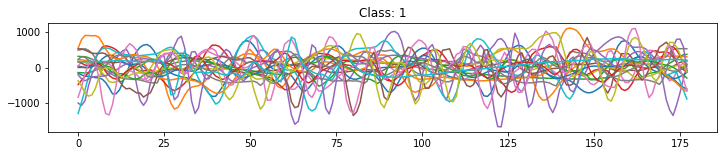

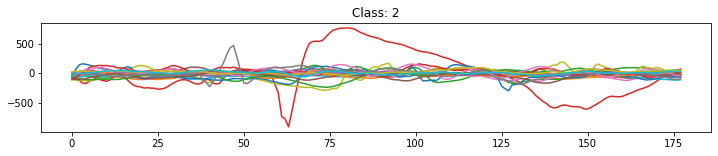

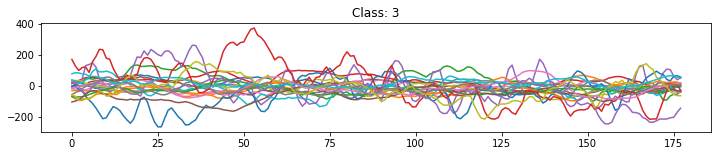

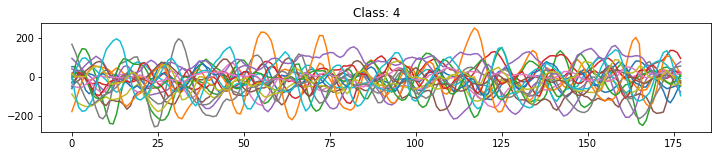

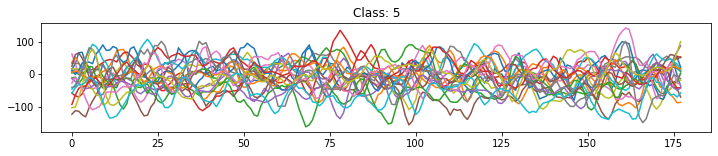

In [4]:
series = pd.read_csv(data_path)
series.drop('Unnamed: 0', axis=1, inplace=True)

X = series.drop('y', axis=1).values
y = series['y'].values.astype(np.int32)

y_5cat = y.copy()
y_2cat = y.copy()

# prepare labels for the binary classification problem: epilepsy vs no epilepsy
y_2cat[y_2cat != 1] = 2

X_5cat = X.copy()
X_2cat = X.copy()

for clase in np.unique(y):
    mask_clase = y == clase
    X_clase = X[mask_clase]
    plot_series(X_clase, clase)

#### Split the dataset in train and validation

In [5]:
X_train_2cat, X_val_2cat, y_train_2cat, y_val_2cat = train_test_split(X_2cat, y_2cat, 
                                                                      test_size=0.2, 
                                                                      random_state=2018)

X_train_5cat, X_val_5cat, y_train_5cat, y_val_5cat = train_test_split(X_5cat, y_5cat, 
                                                                      test_size=0.2, 
                                                                      random_state=2018)

### 1. Binary Classification Example

#### Search the centroids with TS-Evolutionary_Prototyping for the two classes (epilepsy vs no epilepsy) and classify using Nearest Centroid (class NC.py)

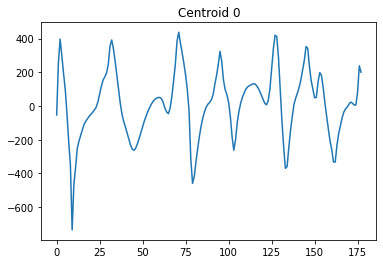

Error class[0]: 1409367647159.140
-------------------------


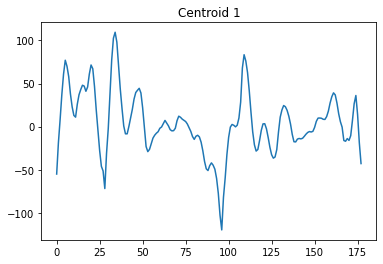

Error class[1]: 291846105963.317
-------------------------
Accuracy DTW NC: 0.948


In [6]:
nc2_dtw = NC(verbose=2, params_ga=params_ga)
nc2_dtw.fit(X_train_2cat, y_train_2cat)
nc2_dtw.predict(X_val_2cat)

nc2_dtw_accuracy = 1 - (nc2_dtw.labels != y_val_2cat).sum() / float(y_val_2cat.shape[0])
print('Accuracy DTW NC: {:.3f}'.format(nc2_dtw_accuracy))

#### Classify using Nearest Centroid class using the Euclidean distance an the NC implementation from library sklearn.
As it can be observed, the centroid calculated using DTW distance is more representative achieving better accuracy.

In [9]:
nc_euclidean = NearestCentroid()
nc_euclidean.fit(X_train_2cat, y_train_2cat)
print('Accuracy Euclidean NC: {:.3f}'.format(nc_euclidean.score(X_val_2cat, y_val_2cat)))

Accuracy Euclidean NC: 0.633


### 2. Multiclass Classification Problem

#### Search the centroids of each one of the five classes and classify using the Nearest Centroid class

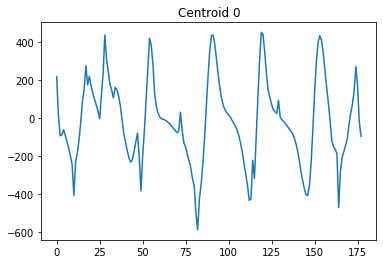

Error class[0]: 1347717047797.811
-------------------------


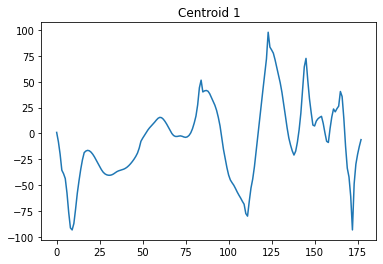

Error class[1]: 123967196818.337
-------------------------


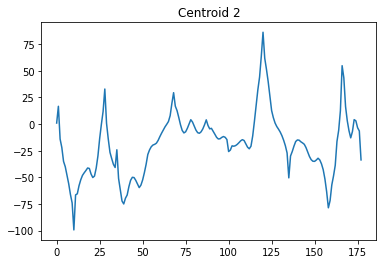

Error class[2]: 39314055374.524
-------------------------


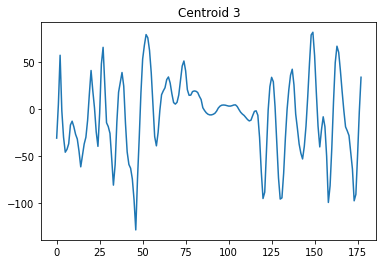

Error class[3]: 60811562251.653
-------------------------


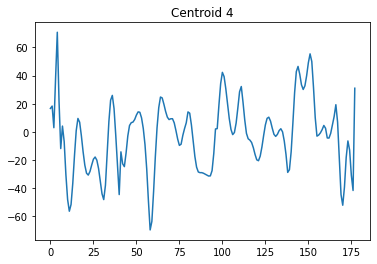

Error class[4]: 31283107907.344
-------------------------
Accuracy DTW NC: 0.503


In [10]:
nc5_dtw = NC(verbose=2, params_ga=params_ga)
nc5_dtw.fit(X_train_5cat, y_train_5cat)
nc5_dtw.predict(X_val_5cat)

nc5_dtw_accuracy = 1 - (nc5_dtw.labels != y_val_5cat).sum() / float(y_val_5cat.shape[0])
print('Accuracy DTW NC: {:.3f}'.format(nc5_dtw_accuracy))

#### Classify using Nearest Centroid class using the Euclidean distance an the NC implementation from library sklearn.

As it can be observed, the centroid calculated using DTW distance is more representative achieving better accuracy.

In [11]:
nc_euclidean = NearestCentroid()
nc_euclidean.fit(X_train_5cat, y_train_5cat)
print('Accuracy Euclidean NC: {:.3f}'.format(nc_euclidean.score(X_val_5cat, y_val_5cat)))

Accuracy Euclidean NC: 0.248
